In [2]:
import pandas as pd
from sklearn.model_selection import GridSearchCV

dataset = pd.read_csv('datiLussazioniDefinitivi.csv', delimiter=';')
dataset

,CASE_ID,BREED,GENDER_01,AGEATSURGERYmo,BODYWEIGHTKG,Taglia,BCS,INDICATIONFORTHR,HIPRL,YEAR,...,NECKSIZE,HEADSIZE,ALO,CUPRETROVERSION,STEMANTEVERSIONREAL,RECTUSFEMORISM.RELEASE,first_lux_days_after_thr,DIRECTION,LUX_01,LUX_CR
0,1,3,0,"56,5","31,6",1,5,4,R,2021,...,4,1,46.0,15,"17,7",NO,NaN,NaN,0,0
1,2,8,0,"9,4","40,9",1,5,4,L,2021,...,5,1,40.0,25,"27,7",NO,NaN,NaN,0,0
2,3,10,0,"15,1333333333333",35,1,5,4,R,2021,...,4,1,42.0,20,"27,7",YES,NaN,NaN,0,0
3,4,6,0,"83,4333333333333","18,7",0,6,4,L,2021,...,4,0,40.0,18,"24,2",NO,NaN,NaN,0,0
4,5,5,0,"7,53333333333333","36,4",1,4,4,L,2021,...,5,1,42.0,28,"25,9",YES,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3192,3193,3,0,"57,4333333333333",25,1,5,2,R,2010,...,3,0,43.0,32,"27,7",NO,35.0,CRANIO-DORSALE,1,1
3193,3194,5,1,"49,2333333333333",38,1,6,2,R,2009,...,4,0,48.0,26,"25,9",NO,18.0,CRANIO-DORSALE,1,1
3194,3195,13,0,"38,0333333333333",43,1,5,2,R,2008,...,4,0,48.0,4,"11,5",NO,30.0,CRANIO-DORSALE,1,1
3195,3196,5,1,"11,5333333333333",28,1,5,2,R,2001,...,4,0,52.0,10,"31,3",NO,26.0,CRANIO-DORSALE,1,1


In [3]:
import sys

sys.path.append('/home/biso/Tirocinio/tirocinio/base_lib')
sys.path.append('/home/biso/Tirocinio/tirocinio/Imputation')

In [4]:
import models
import functions as func

import imputation as imp 

2024-07-03 15:16:51.832295: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-03 15:16:51.832675: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-03 15:16:51.836029: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-03 15:16:51.883229: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-03 15:16:53.473260: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

In [5]:
performance_data = []

### Sottoinsieme del dataset originale

In [6]:
sub_data = func.sub_dataset_cani(dataset)

In [ ]:
cols = ['n_luxation', 'first_lux_days_after_thr', 'DIRECTION']
sub_data[cols] = sub_data[cols].fillna(-1)

sub_data = imp.total_imputation_regression(sub_data)

In [ ]:
sub_data

,BREED,GENDER_01,AGEATSURGERYmo,BODYWEIGHTKG,Taglia,BCS,YEAR,n_luxation,GENERATION,STEMSIZE,...,NECKSIZE,HEADSIZE,ALO,CUPRETROVERSION,STEMANTEVERSIONREAL,RECTUSFEMORISM.RELEASE,first_lux_days_after_thr,DIRECTION,LUX_01,LUX_CR
0,12,0,8.830000,30.0,1,6.0,2019,1.0,6,0,...,4,0,43.0,16,20.8,0,43.0,1.0,1,0
1,11,0,14.000000,24.8,1,4.0,2021,1.0,6,0,...,4,0,38.0,20,22.5,0,9.0,1.0,1,0
2,9,1,11.100000,32.2,1,5.0,2021,1.0,6,1,...,4,1,45.0,15,22.5,0,79.0,1.0,1,0
3,3,1,10.000000,31.8,1,5.0,2021,2.0,6,1,...,4,1,40.0,16,24.2,0,32.0,0.0,1,0
4,3,1,7.770000,25.5,1,4.0,2018,1.0,6,1,...,4,1,45.0,8,20.8,0,222.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,6,0,42.866667,28.2,1,8.0,2021,-1.0,6,3,...,4,0,50.0,15,19.2,2,-1.0,-1.0,0,1
419,10,0,12.566667,33.5,1,6.0,2012,-1.0,4,1,...,5,0,37.0,16,27.7,0,-1.0,-1.0,0,0
420,10,0,8.466667,31.0,1,6.0,2018,-1.0,6,1,...,4,0,43.0,18,17.7,0,-1.0,-1.0,0,0
421,5,1,36.633333,27.0,1,5.0,1998,-1.0,1,1,...,7,1,40.0,16,35.3,0,-1.0,-1.0,0,0


In [ ]:
sub_data['LUX_01'].value_counts()

LUX_01
0    282
1    141
Name: count, dtype: int64

In [ ]:
# definizione di X e y
cols = ['n_luxation', 'DIRECTION', 'first_lux_days_after_thr']
sub_data = sub_data.drop(cols, axis=1)

feature_cols = ['BREED', 'GENDER_01', 'AGEATSURGERYmo', 'BODYWEIGHTKG', 'Taglia', 'BCS', 
                'YEAR', 'GENERATION', 'STEMSIZE', 'CUPSIZE', 'NECKSIZE', 'HEADSIZE', 'ALO', 'CUPRETROVERSION', 'STEMANTEVERSIONREAL', 
                'RECTUSFEMORISM.RELEASE', 'LUX_CR']
X = sub_data[feature_cols]

y = sub_data['LUX_01']

In [ ]:
tree_sub = models.decision_tree_model(X, y, max_depth=10)

Report di classificazione:
              precision    recall  f1-score   support

           0       0.67      0.88      0.76        64
           1       0.65      0.36      0.46        42

    accuracy                           0.67       106
   macro avg       0.66      0.62      0.61       106
weighted avg       0.67      0.67      0.64       106

Risultati sul test set
Accuratezza: 0.6698113207547169
Sensibilità: 0.35714285714285715
Specificità: 0.6521739130434783
F1-score: 0.4615384615384615
ROC AUC: 0.6160714285714286

Risultati sul train set
Accuratezza: 0.9495268138801262
Sensibilità: 0.8383838383838383
Specificità: 1.0
F1-score: 0.9120879120879121
ROC AUC: 0.9191919191919191


In [ ]:
accuratezza= 0.6698113207547169
sensibilità= 0.35714285714285715
specificità= 0.6521739130434783
f1= 0.4615384615384615
roc_auc= 0.6160714285714286

performance_data.append(['subdataset', accuratezza, sensibilità, specificità, f1, roc_auc])

---

### Dataset originale

In [ ]:
dataset = func.clean_dataset(dataset)

In [ ]:
dataset = dataset.drop(['CASE_ID', 'HIPRL', 'INDICATIONFORTHR'], axis=1)

In [ ]:
cols = ['n_luxation', 'first_lux_days_after_thr', 'DIRECTION']
dataset[cols] = dataset[cols].fillna(-1)

In [ ]:
dataset = imp.total_imputation_regression(dataset)

In [ ]:
dataset

,BREED,GENDER_01,AGEATSURGERYmo,BODYWEIGHTKG,Taglia,BCS,YEAR,n_luxation,GENERATION,STEMSIZE,...,NECKSIZE,HEADSIZE,ALO,CUPRETROVERSION,STEMANTEVERSIONREAL,RECTUSFEMORISM.RELEASE,first_lux_days_after_thr,DIRECTION,LUX_01,LUX_CR
0,3,0,56.500000,31.6,1,5.0,2021,-1.0,6,0,...,4,1,46.0,15,17.7,0,-1.0,-1.0,0,0
1,8,0,9.400000,40.9,1,5.0,2021,-1.0,6,1,...,5,1,40.0,25,27.7,0,-1.0,-1.0,0,0
2,10,0,15.133333,35.0,1,5.0,2021,-1.0,6,0,...,4,1,42.0,20,27.7,1,-1.0,-1.0,0,0
3,6,0,83.433333,18.7,0,6.0,2021,-1.0,6,2,...,4,0,40.0,18,24.2,0,-1.0,-1.0,0,0
4,5,0,7.533333,36.4,1,4.0,2021,-1.0,6,1,...,5,1,42.0,28,25.9,1,-1.0,-1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3192,3,0,57.433333,25.0,1,5.0,2010,1.0,4,3,...,3,0,43.0,32,27.7,0,35.0,0.0,1,1
3193,5,1,49.233333,38.0,1,6.0,2009,1.0,4,0,...,4,0,48.0,26,25.9,0,18.0,0.0,1,1
3194,13,0,38.033333,43.0,1,5.0,2008,2.0,3,1,...,4,0,48.0,4,11.5,0,30.0,0.0,1,1
3195,5,1,11.533333,28.0,1,5.0,2001,1.0,2,0,...,4,0,52.0,10,31.3,0,26.0,0.0,1,1


In [ ]:
# definizione di X e y
cols = ['n_luxation', 'DIRECTION', 'first_lux_days_after_thr']
dataset2 = dataset.drop(cols, axis=1)

feature_cols = ['BREED', 'GENDER_01', 'AGEATSURGERYmo', 'BODYWEIGHTKG', 'Taglia', 'BCS', 
                'YEAR', 'GENERATION', 'STEMSIZE', 'CUPSIZE', 'NECKSIZE', 'HEADSIZE', 'ALO', 'CUPRETROVERSION', 'STEMANTEVERSIONREAL', 
                'RECTUSFEMORISM.RELEASE', 'LUX_CR']
X = dataset2[feature_cols]

y = dataset2['LUX_01']

In [ ]:
tree_original = models.decision_tree_model(X, y, max_depth=10)

Report di classificazione:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       770
           1       0.04      0.03      0.04        30

    accuracy                           0.94       800
   macro avg       0.50      0.50      0.50       800
weighted avg       0.93      0.94      0.93       800

Risultati sul test set
Accuratezza: 0.935
Sensibilità: 0.03333333333333333
Specificità: 0.041666666666666664
F1-score: 0.037037037037037035
ROC AUC: 0.5017316017316018

Risultati sul train set
Accuratezza: 0.9841468502294535
Sensibilità: 0.6576576576576577
Specificità: 1.0
F1-score: 0.7934782608695653
ROC AUC: 0.8288288288288288


In [ ]:
accuratezza = 0.935
sensibilità = 0.03333333333333333
specificità = 0.041666666666666664
f1 = 0.037037037037037035
roc_auc = 0.5017316017316018

### Dataset con oversampling (2/3 negativi, 1/3 positivi)

In [ ]:
dataset

,BREED,GENDER_01,AGEATSURGERYmo,BODYWEIGHTKG,Taglia,BCS,YEAR,n_luxation,GENERATION,STEMSIZE,...,NECKSIZE,HEADSIZE,ALO,CUPRETROVERSION,STEMANTEVERSIONREAL,RECTUSFEMORISM.RELEASE,first_lux_days_after_thr,DIRECTION,LUX_01,LUX_CR
0,3,0,56.500000,31.6,1,5.0,2021,-1.0,6,0,...,4,1,46.0,15,17.7,0,-1.0,-1.0,0,0
1,8,0,9.400000,40.9,1,5.0,2021,-1.0,6,1,...,5,1,40.0,25,27.7,0,-1.0,-1.0,0,0
2,10,0,15.133333,35.0,1,5.0,2021,-1.0,6,0,...,4,1,42.0,20,27.7,1,-1.0,-1.0,0,0
3,6,0,83.433333,18.7,0,6.0,2021,-1.0,6,2,...,4,0,40.0,18,24.2,0,-1.0,-1.0,0,0
4,5,0,7.533333,36.4,1,4.0,2021,-1.0,6,1,...,5,1,42.0,28,25.9,1,-1.0,-1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3192,3,0,57.433333,25.0,1,5.0,2010,1.0,4,3,...,3,0,43.0,32,27.7,0,35.0,0.0,1,1
3193,5,1,49.233333,38.0,1,6.0,2009,1.0,4,0,...,4,0,48.0,26,25.9,0,18.0,0.0,1,1
3194,13,0,38.033333,43.0,1,5.0,2008,2.0,3,1,...,4,0,48.0,4,11.5,0,30.0,0.0,1,1
3195,5,1,11.533333,28.0,1,5.0,2001,1.0,2,0,...,4,0,52.0,10,31.3,0,26.0,0.0,1,1


In [ ]:
colonne_fisse = ['GENDER_01', 'YEAR', 'LUX_CR']

In [ ]:
# Conta la rappresentazione delle tuple delle feature fissate
tuples_count = dataset.groupby(colonne_fisse).size().reset_index(name='count')
tuples_count

,GENDER_01,YEAR,LUX_CR,count
0,0,1997,0,5
1,0,1998,0,2
2,0,1999,0,9
3,0,2000,0,4
4,0,2001,0,5
...,...,...,...,...
79,1,2019,1,42
80,1,2020,0,86
81,1,2020,1,38
82,1,2021,0,106


In [ ]:
# Trova le tuple meno rappresentate
min_representation = tuples_count[tuples_count['count']<=3]
min_representation

,GENDER_01,YEAR,LUX_CR,count
1,0,1998,0,2
8,0,2004,1,2
10,0,2005,1,2
12,0,2006,1,1
14,0,2007,1,3
46,1,2001,0,3
47,1,2001,1,1
52,1,2005,1,1
54,1,2006,1,2
56,1,2007,1,2


In [ ]:
max_representation = tuples_count[tuples_count['count']>=60]
max_representation

,GENDER_01,YEAR,LUX_CR,count
17,0,2009,0,66
23,0,2012,0,69
27,0,2014,0,86
29,0,2015,0,70
31,0,2016,0,85
33,0,2017,0,78
35,0,2018,0,111
37,0,2019,0,98
39,0,2020,0,111
41,0,2021,0,130


In [ ]:
# Filtra il DataFrame originale rimuovendo le tuple meno rappresentate
dataset = dataset[~dataset[colonne_fisse].apply(tuple, axis=1).isin(min_representation[colonne_fisse].apply(tuple, axis=1))]
dataset

,BREED,GENDER_01,AGEATSURGERYmo,BODYWEIGHTKG,Taglia,BCS,YEAR,n_luxation,GENERATION,STEMSIZE,...,NECKSIZE,HEADSIZE,ALO,CUPRETROVERSION,STEMANTEVERSIONREAL,RECTUSFEMORISM.RELEASE,first_lux_days_after_thr,DIRECTION,LUX_01,LUX_CR
0,3,0,56.500000,31.6,1,5.0,2021,-1.0,6,0,...,4,1,46.0,15,17.7,0,-1.0,-1.0,0,0
1,8,0,9.400000,40.9,1,5.0,2021,-1.0,6,1,...,5,1,40.0,25,27.7,0,-1.0,-1.0,0,0
2,10,0,15.133333,35.0,1,5.0,2021,-1.0,6,0,...,4,1,42.0,20,27.7,1,-1.0,-1.0,0,0
3,6,0,83.433333,18.7,0,6.0,2021,-1.0,6,2,...,4,0,40.0,18,24.2,0,-1.0,-1.0,0,0
4,5,0,7.533333,36.4,1,4.0,2021,-1.0,6,1,...,5,1,42.0,28,25.9,1,-1.0,-1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3191,2,0,59.866667,20.0,0,5.0,2010,1.0,4,3,...,3,0,36.0,16,46.7,0,2791.0,0.0,1,1
3192,3,0,57.433333,25.0,1,5.0,2010,1.0,4,3,...,3,0,43.0,32,27.7,0,35.0,0.0,1,1
3193,5,1,49.233333,38.0,1,6.0,2009,1.0,4,0,...,4,0,48.0,26,25.9,0,18.0,0.0,1,1
3194,13,0,38.033333,43.0,1,5.0,2008,2.0,3,1,...,4,0,48.0,4,11.5,0,30.0,0.0,1,1


In [ ]:
dataset['LUX_01'].value_counts()

LUX_01
0    3040
1     138
Name: count, dtype: int64

In [ ]:
# salvo tutti i dati originali
dataset_original = dataset

# Separa feature e target
X = dataset.drop(['LUX_01'], axis=1)
y = dataset['LUX_01']

y_test_0 = dataset[dataset['LUX_01']==0].sample(n=138, random_state=42)
y_test_1 = dataset[dataset['LUX_01']==1]

lista_dataframe = [y_test_0, y_test_1]

testing_set = pd.concat(lista_dataframe, ignore_index=True)
testing_set

,BREED,GENDER_01,AGEATSURGERYmo,BODYWEIGHTKG,Taglia,BCS,YEAR,n_luxation,GENERATION,STEMSIZE,...,NECKSIZE,HEADSIZE,ALO,CUPRETROVERSION,STEMANTEVERSIONREAL,RECTUSFEMORISM.RELEASE,first_lux_days_after_thr,DIRECTION,LUX_01,LUX_CR
0,9,0,88.733333,50.0,1,6.0,2020,-1.0,6,1,...,5,2,40.0,18,24.2,0,-1.0,-1.0,0,0
1,7,0,10.066667,48.6,1,5.0,2016,-1.0,5,1,...,5,1,43.0,10,27.7,2,-1.0,-1.0,0,1
2,10,0,86.633333,39.0,1,7.0,2021,-1.0,6,0,...,4,1,40.0,20,20.8,0,-1.0,-1.0,0,0
3,6,0,15.766667,22.4,1,4.0,2018,-1.0,6,3,...,4,0,40.0,20,20.8,0,-1.0,-1.0,0,0
4,13,0,70.333333,41.5,1,6.0,2015,-1.0,5,1,...,5,1,45.0,16,27.7,0,-1.0,-1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,2,0,59.866667,20.0,0,5.0,2010,1.0,4,3,...,3,0,36.0,16,46.7,0,2791.0,0.0,1,1
272,3,0,57.433333,25.0,1,5.0,2010,1.0,4,3,...,3,0,43.0,32,27.7,0,35.0,0.0,1,1
273,5,1,49.233333,38.0,1,6.0,2009,1.0,4,0,...,4,0,48.0,26,25.9,0,18.0,0.0,1,1
274,13,0,38.033333,43.0,1,5.0,2008,2.0,3,1,...,4,0,48.0,4,11.5,0,30.0,0.0,1,1


In [ ]:
testing_set['LUX_01'].value_counts()

LUX_01
0    138
1    138
Name: count, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25, stratify=y)

categorical_features = [True if dtype.name == 'int64'else False for dtype in X.dtypes]

n_negative = len(dataset[dataset['LUX_01']==0])
n_positive = func.get_strategy_oversampling(n_negative, 2/3)

# Definizione della strategia di oversampling
sampling_strategy = {0: n_negative, 1: n_positive}

# Inizializza l'oggetto SMOTENC con le colonne fisse e categoriche specificate
smote_nc = SMOTENC(categorical_features=categorical_features, random_state=42, sampling_strategy=sampling_strategy)

# Applica l'oversampling
X_resampled, y_resampled = smote_nc.fit_resample(X, y)

# Converti X_resampled e y_resampled in DataFrame
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.Series(y_resampled, name='LUX_01')

# Concatena i dataset originali e sintetici
df = pd.concat([X_resampled_df, y_resampled_df], axis=1)

In [ ]:
df

,BREED,GENDER_01,AGEATSURGERYmo,BODYWEIGHTKG,Taglia,BCS,YEAR,n_luxation,GENERATION,STEMSIZE,...,NECKSIZE,HEADSIZE,ALO,CUPRETROVERSION,STEMANTEVERSIONREAL,RECTUSFEMORISM.RELEASE,first_lux_days_after_thr,DIRECTION,LUX_CR,LUX_01
0,3,0,56.500000,31.600000,1,5.000000,2021,-1.000000,6,0,...,4,1,46.000000,15,17.700000,0,-1.000000,-1.000000,0,0
1,8,0,9.400000,40.900000,1,5.000000,2021,-1.000000,6,1,...,5,1,40.000000,25,27.700000,0,-1.000000,-1.000000,0,0
2,10,0,15.133333,35.000000,1,5.000000,2021,-1.000000,6,0,...,4,1,42.000000,20,27.700000,1,-1.000000,-1.000000,0,0
3,6,0,83.433333,18.700000,0,6.000000,2021,-1.000000,6,2,...,4,0,40.000000,18,24.200000,0,-1.000000,-1.000000,0,0
4,5,0,7.533333,36.400000,1,4.000000,2021,-1.000000,6,1,...,5,1,42.000000,28,25.900000,1,-1.000000,-1.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4555,9,0,11.884122,40.067933,1,5.000000,2015,2.000000,5,1,...,4,1,41.640100,15,40.675840,0,24.320050,0.160025,1,1
4556,3,0,11.104394,39.390245,1,4.023352,2021,1.023352,6,0,...,4,1,40.116760,8,19.237363,0,19.906592,0.000000,1,1
4557,3,1,9.538939,19.616922,0,5.756214,2016,2.000000,5,3,...,4,0,42.000000,15,32.275146,0,92.781068,1.000000,0,1
4558,3,0,10.098693,30.917046,1,5.082954,2013,1.458523,5,0,...,4,0,43.624431,30,33.134092,0,18.624431,0.000000,1,1


In [ ]:
df = df.sample(frac=1, random_state=42)

### Prova con regressione logistica

In [ ]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25, stratify=y)

categorical_features = [True if dtype.name == 'int64'else False for dtype in X.dtypes]

n_negative = len(dataset[dataset['LUX_01']==0])
n_positive = func.get_strategy_oversampling(n_negative, 2/3)

# Definizione della strategia di oversampling
sampling_strategy = {0: n_negative, 1: n_positive}

# Inizializza l'oggetto SMOTENC con le colonne fisse e categoriche specificate
smote_nc = SMOTENC(categorical_features=categorical_features, random_state=42, sampling_strategy=sampling_strategy)

# Applica l'oversampling
X_resampled, y_resampled = smote_nc.fit_resample(X_train, y_train)

clf = LogisticRegression().fit(X_resampled, y_resampled)

predictions = clf.predict(X_test)
print("Report di classificazione")
print(classification_report(y_test, predictions)) 


accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions)
precision = precision_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)

# Stampa dei risultati
print("Accuratezza:", accuracy)
print("Sensibilità:", recall)
print("Specificità:", precision)
print("F1-score:", f1)
print("ROC AUC:", roc_auc) 

Report di classificazione
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       760
           1       1.00      1.00      1.00        35

    accuracy                           1.00       795
   macro avg       1.00      1.00      1.00       795
weighted avg       1.00      1.00      1.00       795

Accuratezza: 1.0
Sensibilità: 1.0
Specificità: 1.0
F1-score: 1.0
ROC AUC: 1.0


/home/biso/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import balanced_accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25, stratify=y)

categorical_features = [True if dtype.name == 'int64'else False for dtype in X.dtypes]

n_negative = len(dataset[dataset['LUX_01']==0])
n_positive = func.get_strategy_oversampling(n_negative, 2/3)

# Definizione della strategia di oversampling
sampling_strategy = {0: n_negative, 1: n_positive}

# Inizializza l'oggetto SMOTENC con le colonne fisse e categoriche specificate
smote_nc = SMOTENC(categorical_features=categorical_features, random_state=42, sampling_strategy=sampling_strategy)

# Applica l'oversampling
X_resampled, y_resampled = smote_nc.fit_resample(X_train, y_train)

model = DecisionTreeClassifier(random_state=42, max_depth=7)

model.fit(X_resampled, y_resampled)

predictions = model.predict(X_test)

print("Metriche:")

accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions)
precision = precision_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)

# Stampa dei risultati
print("Accuratezza:", accuracy)
print("Sensibilità:", recall)
print("Specificità:", precision)
print("F1-score:", f1)
print("ROC AUC:", roc_auc) 

print("\nMetriche")
accuracy = balanced_accuracy_score(y_test, predictions)
print("Accuracy = ", accuracy)

Metriche:
Accuratezza: 1.0
Sensibilità: 1.0
Specificità: 1.0
F1-score: 1.0
ROC AUC: 1.0

Metriche
Accuracy =  1.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,  # drop the target
    y,  # just the target
    test_size=0.3,
    random_state=42)

((2224, 20), (954, 20))

In [ ]:
rf = DecisionTreeClassifier(random_state=42, max_depth=10)

rf.fit(X_train, y_train)

predictions_train = rf.predict_proba(X_train)[:,1]
predictions_test = rf.predict_proba(X_test)[:,1]

In [ ]:
print('Precision Random Forest test:', precision_score(y_test, rf.predict(X_test)))
print('Recall Random Forest test:', recall_score(y_test, rf.predict(X_test), pos_label=1))
print('Recall Random Forest test:', recall_score(y_test, rf.predict(X_test), pos_label=1))

Precision Random Forest test: 1.0
Recall Random Forest test: 1.0
Recall Random Forest test: 1.0


In [9]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, f1_score
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter
from sklearn.model_selection import train_test_split

# Dividi il dataset in training set e test set (dati originali)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Applica SMOTENC per bilanciare il training set
smote_nc = SMOTENC(categorical_features=categorical_features, random_state=42)
X_train_resampled, y_train_resampled = smote_nc.fit_resample(X_train, y_train)

# Addestra l'albero di decisione sul training set bilanciato
model = DecisionTreeClassifier()
model.fit(X_train_resampled, y_train_resampled)

# Effettua le previsioni sul test set (dati originali)
y_pred = model.predict(X_test)

# Valuta il modello sui dati originali
print(classification_report(y_test, y_pred))

NameError: name 'X' is not defined

In [ ]:
# Esegui il merge con indicatore
merged_df = df.merge(testing_set, on=df.columns.tolist(), how='inner', indicator=True)

# Filtra le righe presenti in entrambi i DataFrame
righe_comuni = merged_df[merged_df['_merge'] == 'both'].drop(columns='_merge')

# Assumendo che 'df' e 'righe_comuni' siano già definiti
merged_df = df.merge(righe_comuni, on=df.columns.tolist(), how='left', indicator=True)
training_set = merged_df[merged_df['_merge'] == 'left_only'].drop(columns='_merge')

In [ ]:
feature_cols = ['BREED', 'GENDER_01', 'AGEATSURGERYmo', 'BODYWEIGHTKG', 'Taglia', 'BCS', 
                'YEAR', 'GENERATION', 'STEMSIZE', 'CUPSIZE', 'NECKSIZE', 'HEADSIZE', 'ALO', 'CUPRETROVERSION', 'STEMANTEVERSIONREAL', 
                'RECTUSFEMORISM.RELEASE', 'LUX_CR']



X_train = training_set[feature_cols]
y_train = training_set['LUX_01']

X_test = testing_set[feature_cols]
y_test = testing_set['LUX_01']

In [ ]:
model = DecisionTreeClassifier(random_state=42, max_depth=10)


model.fit(X_train, y_train)

predictions = model.predict(X_test)

print("Report di classificazione:")
print(classification_report(y_test, predictions))

accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions)
precision = precision_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)

# Stampa dei risultati
print("Accuratezza:", accuracy)
print("Sensibilità:", recall)
print("Specificità:", precision)
print("F1-score:", f1)
print("ROC AUC:", roc_auc)

Report di classificazione:
              precision    recall  f1-score   support

           0       0.56      0.93      0.70       138
           1       0.78      0.26      0.39       138

    accuracy                           0.59       276
   macro avg       0.67      0.59      0.54       276
weighted avg       0.67      0.59      0.54       276

Accuratezza: 0.5942028985507246
Sensibilità: 0.2608695652173913
Specificità: 0.782608695652174
F1-score: 0.391304347826087
ROC AUC: 0.5942028985507246


In [ ]:
y_test_0 = dataset[dataset['LUX_01']==0].sample(n=276, random_state=42)
y_test_1 = dataset[dataset['LUX_01']==1]

lista_dataframe = [y_test_0, y_test_1]

testing_set = pd.concat(lista_dataframe, ignore_index=True)

# Esegui il merge tra i due dataset
merged_df = df.merge(testing_set, on=df.columns.tolist(), how='inner', indicator=True)

# Filtra le righe presenti in entrambi i DataFrame
righe_comuni = merged_df[merged_df['_merge'] == 'both'].drop(columns='_merge')

# Elimino da df le righe comuni presenti in testin_set
merged_df = df.merge(righe_comuni, on=df.columns.tolist(), how='left', indicator=True)
training_set = merged_df[merged_df['_merge'] == 'left_only'].drop(columns='_merge')

feature_cols = ['BREED', 'GENDER_01', 'AGEATSURGERYmo', 'BODYWEIGHTKG', 'Taglia', 'BCS', 
                'YEAR', 'GENERATION', 'STEMSIZE', 'CUPSIZE', 'NECKSIZE', 'HEADSIZE', 'ALO', 'CUPRETROVERSION', 'STEMANTEVERSIONREAL', 
                'RECTUSFEMORISM.RELEASE', 'LUX_CR']

X_train = training_set[feature_cols]
y_train = training_set['LUX_01']

X_test = testing_set[feature_cols]
y_test = testing_set['LUX_01']

model = DecisionTreeClassifier(random_state=42, max_depth=10, min_impurity_decrease=0.0, min_samples_split=4, criterion='gini')


model.fit(X_train, y_train)

predictions = model.predict(X_test)

print("Report di classificazione:")
print(classification_report(y_test, predictions))

accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions)
precision = precision_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)

# Stampa dei risultati
print("Accuratezza:", accuracy)
print("Sensibilità:", recall)
print("Specificità:", precision)
print("F1-score:", f1)
print("ROC AUC:", roc_auc)

Report di classificazione:
              precision    recall  f1-score   support

           0       0.71      0.97      0.82       276
           1       0.81      0.21      0.33       138

    accuracy                           0.72       414
   macro avg       0.76      0.59      0.58       414
weighted avg       0.74      0.72      0.66       414

Accuratezza: 0.7198067632850241
Sensibilità: 0.21014492753623187
Specificità: 0.8055555555555556
F1-score: 0.3333333333333333
ROC AUC: 0.5923913043478262


In [ ]:
Accuratezza= 0.7198067632850241
Sensibilità= 0.21014492753623187
Specificità= 0.8055555555555556
f1= 0.3333333333333333
roc_auc = 0.5923913043478262

performance_data.append(['dataset_original', accuratezza, sensibilità, specificità, f1, roc_auc])

---

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import seaborn as sns 

Valutiamo i vari iperparametri.

In [ ]:
df = df.drop(['n_luxation', 'DIRECTION', 'first_lux_days_after_thr'], axis=1)

In [ ]:
df = df.sample(frac=1, random_state=42)

In [ ]:
parama_grid = {
    'max_depth': [7, 8, 9, 10, 11, 12, 14, 15],
    'criterion': ["gini", "entropy"],
    'min_samples_split': [2, 4, 5, 7, 9, 10],
    'min_impurity_decrease': [0.0, 0.01, 0.02, 0.05]
}

X = df[feature_cols]
y = df['LUX_01']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# definizione della grid search
model = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(estimator=model,
                            param_grid=parama_grid, 
                            cv=5)

grid_search.fit(X_train, y_train)

# Migliori parametri trovati dalla grid search
best_params = grid_search.best_params_
print("Migliori parametri trovati dalla grid search:", best_params)

Migliori parametri trovati dalla grid search: {'criterion': 'gini', 'max_depth': 15, 'min_impurity_decrease': 0.0, 'min_samples_split': 4}


Una volta trovati i migliori parametri posso allenare il modello.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

# albero di decisione, in cui faccio lo shuffle 10 volte
feature_cols = ['BREED', 'GENDER_01', 'AGEATSURGERYmo', 'BODYWEIGHTKG', 'Taglia', 'BCS', 
                'YEAR', 'GENERATION', 'STEMSIZE', 'CUPSIZE', 'NECKSIZE', 'HEADSIZE', 'ALO', 'CUPRETROVERSION', 'STEMANTEVERSIONREAL', 
                'RECTUSFEMORISM.RELEASE', 'LUX_CR']

# Liste per tutte le metriche
accuracies = []
precisions = []
recalls = []
f1_scores = []
roc_aucs = []

mods = []  # per salvare tutti i modelli

for i in range(10):

    df = df.sample(frac=1, random_state=42)

    X = df[feature_cols]
    y = df['LUX_01']

    print("Risultati iterazione numero", i+1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, test_size=0.25)
    
    model = DecisionTreeClassifier(random_state=42, max_depth=15, criterion='gini', min_impurity_decrease=0.0, min_samples_split=2)

    model.fit(X_train, y_train)
    mods.append(model)

    predictions = model.predict(X_test)

    accuracy = accuracy_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    roc_auc = roc_auc_score(y_test, predictions)

    # Stampa dei risultati
    print("Accuratezza:", accuracy)
    print("Sensibilità:", recall)
    print("Specificità:", precision)
    print("F1-score:", f1)
    print("ROC AUC:", roc_auc)

    accuracies.append(accuracy)
    recalls.append(recall)
    precisions.append(precision)
    f1_scores.append(f1)
    roc_aucs.append(roc_auc)

    print("--------------------------------------------------------------------")

Risultati iterazione numero 1
Accuratezza: 0.8833333333333333
Sensibilità: 0.8210526315789474
Specificità: 0.8275862068965517
F1-score: 0.8243064729194188
ROC AUC: 0.8677631578947369
--------------------------------------------------------------------
Risultati iterazione numero 2
Accuratezza: 0.874561403508772
Sensibilità: 0.8342105263157895
Specificità: 0.7984886649874056
F1-score: 0.8159588159588159
ROC AUC: 0.8644736842105264
--------------------------------------------------------------------
Risultati iterazione numero 3
Accuratezza: 0.874561403508772
Sensibilità: 0.8184210526315789
Specificità: 0.8077922077922078
F1-score: 0.8130718954248366
ROC AUC: 0.8605263157894737
--------------------------------------------------------------------
Risultati iterazione numero 4
Accuratezza: 0.8842105263157894
Sensibilità: 0.8526315789473684
Specificità: 0.81
F1-score: 0.8307692307692308
ROC AUC: 0.8763157894736843
--------------------------------------------------------------------
Risultat

Calcoliamo media e deviazione standard per ogni metrica.

In [ ]:
metrics = {
    'Accuratezza': accuracies,
    'Specificità': precisions,
    'Sensibilità': recalls,
    'F1 Score': f1_scores,
    'ROC AUC': roc_aucs
}

metrics_summary = {
    'Metrica': [],
    'Media': [],
    'Deviazione standard': []
}

for metric_name, values in metrics.items():
    metrics_summary['Metrica'].append(metric_name)
    metrics_summary['Media'].append(sum(values) / len(values))
    metrics_summary['Deviazione standard'].append(pd.Series(values).std())

# Converto in un dataframe
metrics_df = pd.DataFrame(metrics_summary)

color = ['blue', 'orange', 'green', 'red', 'purple']

# traccia il grafico
plt.figure(figsize=(10, 6))
plt.bar(metrics_df['Metrica'], metrics_df['Media'], yerr=metrics_df['Deviazione standard'], capsize=5, color=color)
plt.xlabel('Metriche')
plt.ylabel('Valori')
plt.title('Media e deviazione standard delle varie metriche')
plt.ylim(0, 1)
plt.grid(True)
plt.show()

metrics_df

NameError: name 'accuracies' is not defined

Ora valutiamo tutte le varie metriche separate.

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns 

# Create a DataFrame for the box plots
metrics_total_df = pd.DataFrame({
    'Iterazione': range(1, 11),
    'Accuratezza': accuracies,
    'Specificità': precisions,
    'Sensibilità': recalls,
    'F1 Score': f1_scores,
    'ROC AUC': roc_aucs
})

# Melt the DataFrame for easier plotting with seaborn
metrics_boxplot_melted = metrics_total_df.melt(id_vars=['Iterazione'], var_name='Metric', value_name='Value')

# Plot the box plots for each metric
plt.figure(figsize=(12, 8))
sns.boxplot(x='Metric', y='Value', data=metrics_boxplot_melted)
plt.title('Box Plots delle Metriche')
plt.ylabel('Value')
plt.show()

metrics_total_df

NameError: name 'accuracies' is not defined

In [ ]:
performance_data.append(['dataset_2_3', metrics_df['Media'][0], metrics_df['Media'][2], metrics_df['Media'][1], metrics_df['Media'][3], metrics_df['Media'][4]])

Ora tracciamo il grafico dell'albero e il grafico sull'importanza delle feature.

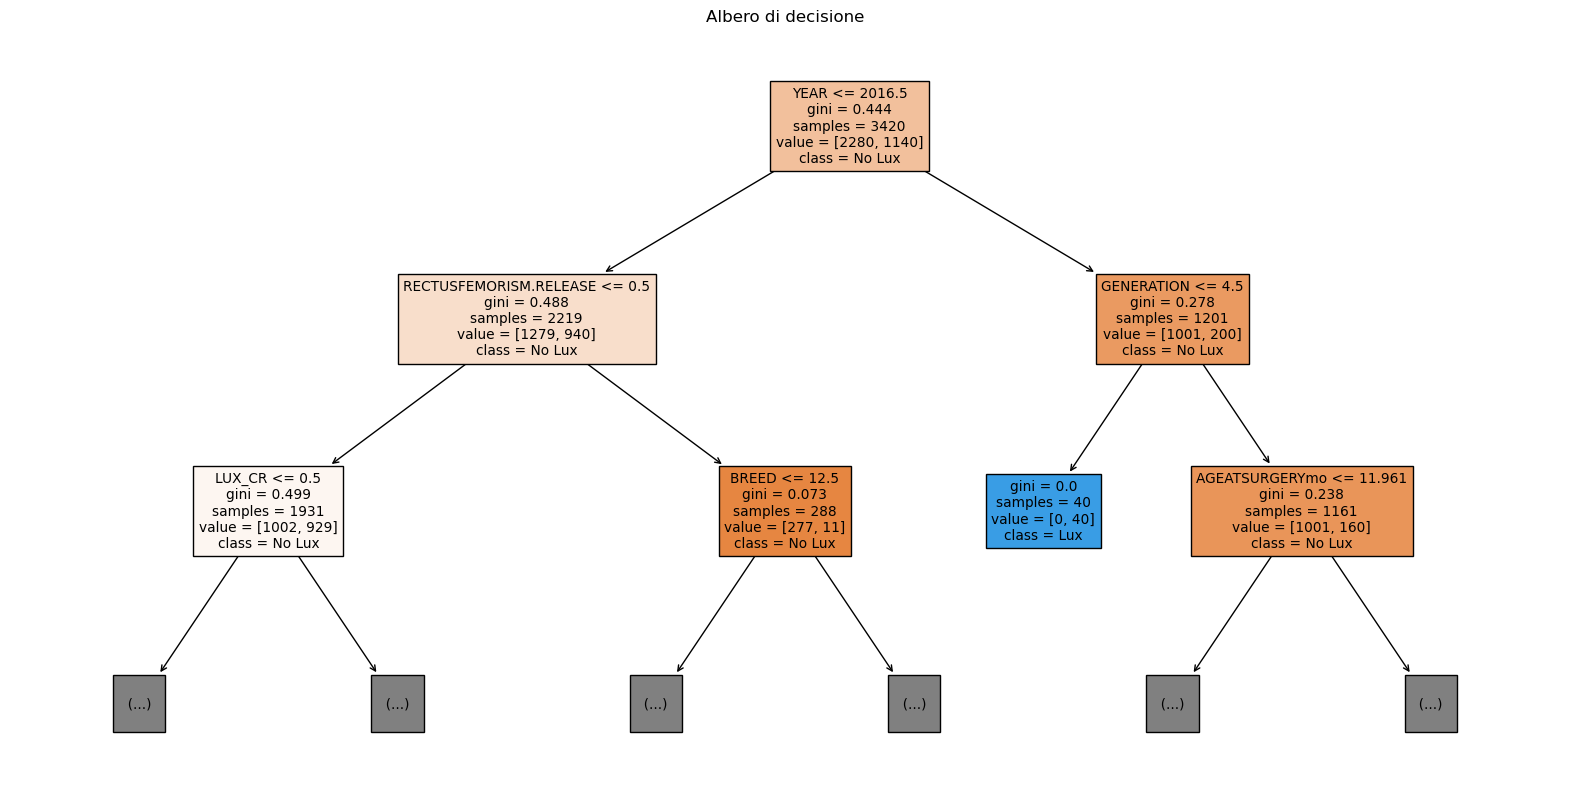

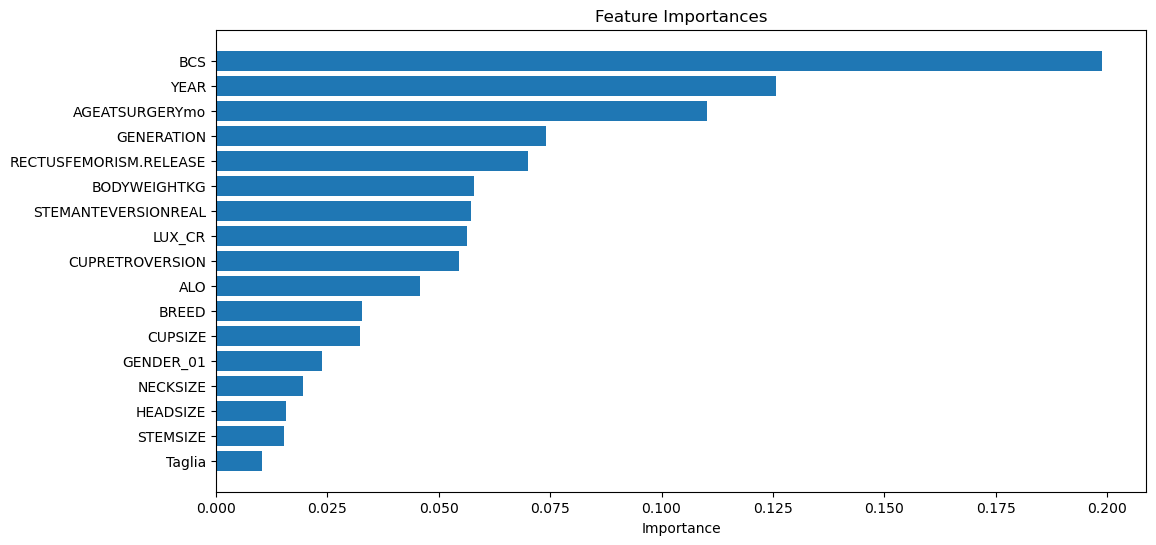

In [ ]:
import numpy as np 

mean_accuracy = metrics_df['Media'][0]

# Identifica il modello con l'accuretezza più vicina alla media 
closest_index = np.argmin([abs(accuracy - mean_accuracy) for accuracy in accuracies])
best_model = mods[closest_index]

# Visualizza l'albero decisionale del miglior modello
plt.figure(figsize=(20, 10))
plot_tree(best_model, feature_names=feature_cols, class_names=['No Lux', 'Lux'], filled=True, max_depth=2)
plt.title('Albero di decisione')
plt.show()

# Visualizza le importanze delle feature
feature_importances = best_model.feature_importances_
features_df = pd.DataFrame({'Feature': feature_cols, 'Importance': feature_importances})

# Ordina per importanza
features_df = features_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
plt.barh(features_df['Feature'], features_df['Importance'])
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.gca().invert_yaxis()
plt.show()

### Dataset con oversampling (1/2 casi negativi, 1/2 casi positivi)

In [ ]:
# Separa feature e target
X = dataset.drop(['LUX_01'], axis=1)
y = dataset['LUX_01']

In [ ]:
n_positive = func.get_strategy_oversampling(n_negative, 1/2)

# Definizione della strategia di oversampling
sampling_strategy = {0: n_negative, 1: n_positive}

# Inizializza l'oggetto SMOTENC con le colonne fisse e categoriche specificate
smote_nc = SMOTENC(categorical_features=categorical_features, random_state=42, sampling_strategy=sampling_strategy)

# Applica l'oversampling
X_resampled, y_resampled = smote_nc.fit_resample(X, y)

# Converti X_resampled e y_resampled in DataFrame
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.Series(y_resampled, name='target')

# Concatena i dataset originali e sintetici
df_total = pd.concat([X_resampled_df, y_resampled_df], axis=1)

In [ ]:
df_total

,BREED,GENDER_01,AGEATSURGERYmo,BODYWEIGHTKG,Taglia,BCS,YEAR,n_luxation,GENERATION,STEMSIZE,...,NECKSIZE,HEADSIZE,ALO,CUPRETROVERSION,STEMANTEVERSIONREAL,RECTUSFEMORISM.RELEASE,first_lux_days_after_thr,DIRECTION,LUX_CR,target
0,3,0,56.500000,31.600000,1,5.000000,2021,-1.000000,6,0,...,4,1,46.000000,15,17.700000,0,-1.000000,-1.000000,0,0
1,8,0,9.400000,40.900000,1,5.000000,2021,-1.000000,6,1,...,5,1,40.000000,25,27.700000,0,-1.000000,-1.000000,0,0
2,10,0,15.133333,35.000000,1,5.000000,2021,-1.000000,6,0,...,4,1,42.000000,20,27.700000,1,-1.000000,-1.000000,0,0
3,6,0,83.433333,18.700000,0,6.000000,2021,-1.000000,6,2,...,4,0,40.000000,18,24.200000,0,-1.000000,-1.000000,0,0
4,5,0,7.533333,36.400000,1,4.000000,2021,-1.000000,6,1,...,5,1,42.000000,28,25.900000,1,-1.000000,-1.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6075,9,1,16.949487,35.099011,1,5.000000,2013,1.000000,4,1,...,5,0,50.033004,15,21.664684,0,5.033004,0.483498,0,1
6076,10,0,10.923077,27.332791,1,5.000000,2013,2.000000,4,3,...,4,0,45.858299,23,36.158299,0,27.858299,0.000000,1,1
6077,3,1,9.563920,20.502635,0,5.074896,2016,2.000000,5,3,...,4,0,42.000000,15,35.000417,0,89.374479,1.000000,0,1
6078,3,1,8.248624,33.509570,1,5.000000,2021,1.893840,6,0,...,4,1,40.424641,16,18.029097,0,27.363038,0.893840,1,1


In [ ]:
df_total['target'].value_counts()

target
0    3040
1    3040
Name: count, dtype: int64

In [ ]:
# Nuova definizione di X e y
#cols = ['n_luxation', 'DIRECTION', 'first_lux_days_after_thr']
#df_total = df_total.drop(cols, axis=1)

feature_cols = ['BREED', 'GENDER_01', 'AGEATSURGERYmo', 'BODYWEIGHTKG', 'Taglia', 'BCS', 
                'YEAR', 'GENERATION', 'STEMSIZE', 'CUPSIZE', 'NECKSIZE', 'HEADSIZE', 'ALO', 'CUPRETROVERSION', 'STEMANTEVERSIONREAL', 
                'RECTUSFEMORISM.RELEASE', 'LUX_CR']
X = df_total[feature_cols]

y = df_total['target']

In [ ]:
tree2 = models.decision_tree_model(X, y, max_depth=10)

Report di classificazione:
              precision    recall  f1-score   support

           0       0.93      0.87      0.90       787
           1       0.87      0.93      0.90       733

    accuracy                           0.90      1520
   macro avg       0.90      0.90      0.90      1520
weighted avg       0.90      0.90      0.90      1520

Risultati sul test set
Accuratezza: 0.8980263157894737
Sensibilità: 0.927694406548431
Specificità: 0.8695652173913043
F1-score: 0.8976897689768976
ROC AUC: 0.8990441537189424

Risultati sul train set
Accuratezza: 0.9403508771929825
Sensibilità: 0.9488513220632857
Specificità: 0.9342723004694836
F1-score: 0.9415053763440862
ROC AUC: 0.9402490076805554


In [ ]:
accuratezza = 0.8763089005235603
sensibilità = 0.8987854251012146
specificità = 0.8538461538461538
f1 = 0.8757396449704142
roc_auc = 0.8769657748123608

performance_data.append(['dataset_1_2', accuratezza, sensibilità, specificità, f1, roc_auc])

In [ ]:
# Organizza i risultati in un DataFrame
performance_df = pd.DataFrame(performance_data, columns=["Modello", "Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"])

In [ ]:
performance_df

,Modello,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,subdataset,0.669811,0.357143,0.652174,0.461538,0.616071
1,dataset_original,0.935000,0.033333,0.041667,0.333333,0.592391
2,dataset_2_3,0.882105,0.836316,0.814952,0.825424,0.870658
3,dataset_1_2,0.876309,0.898785,0.853846,0.875740,0.876966


In [ ]:
import matplotlib.pyplot as plt

performance_df.set_index("Modello", inplace=True)
performance_df.plot(kind='bar', figsize=(10, 6))
plt.title('Confronto Metriche dei Decision tree sui vari dataset')
plt.xlabel('Modello')
plt.ylabel('Valore della Metrica')
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

KeyError: "None of ['Modello'] are in the columns"

### Confronto matrici di correlazione

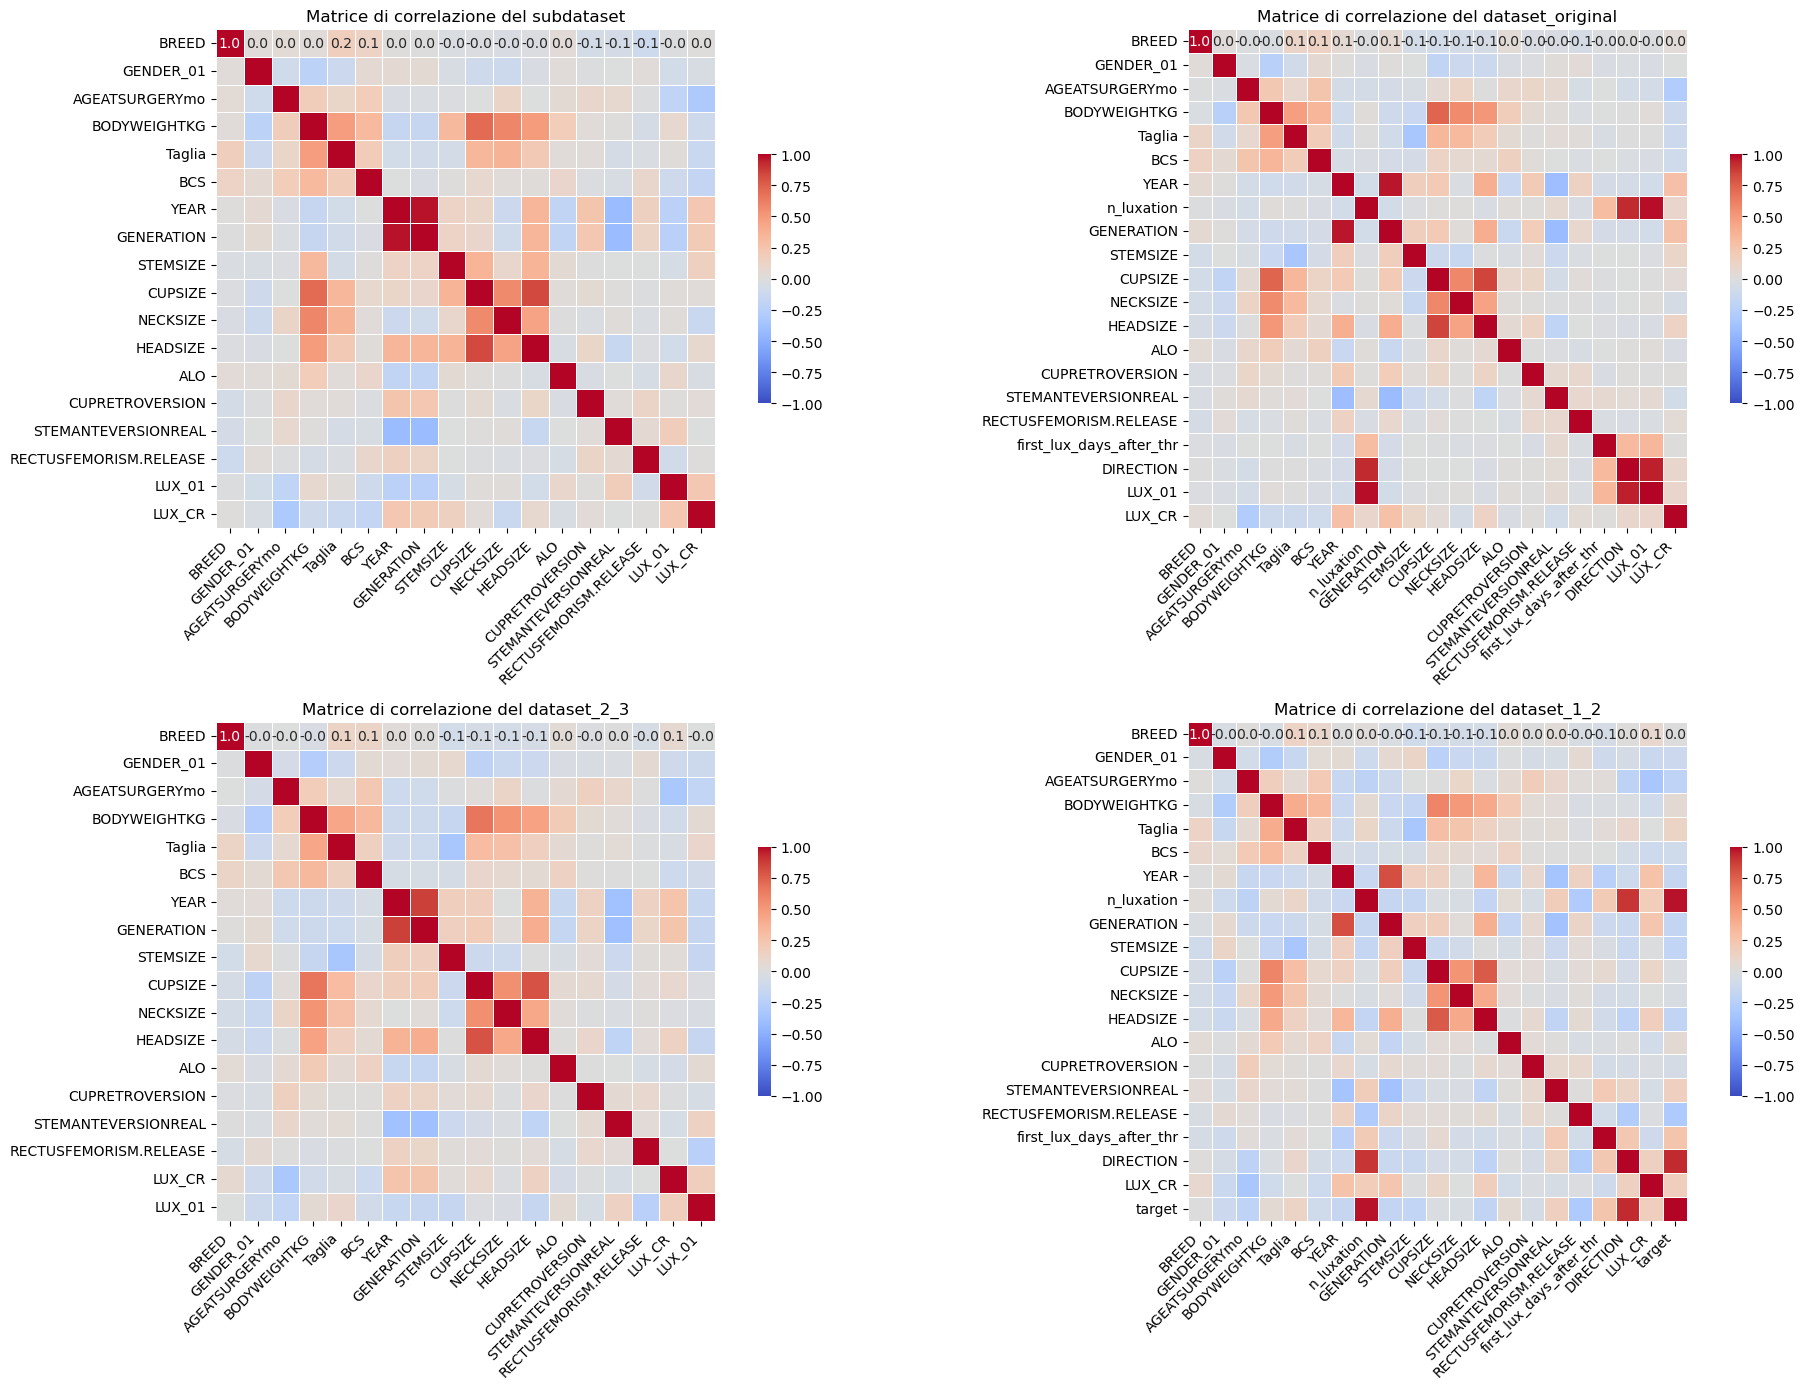

In [ ]:
import seaborn as sns 

correlation_matrices = []

correlation_matrices.append(sub_data.corr())
correlation_matrices.append(dataset.corr())
correlation_matrices.append(df.corr())
correlation_matrices.append(df_total.corr())

model_names = ['subdataset', 'dataset_original', 'dataset_2_3', 'dataset_1_2']

# crea una griglia 2x2 di subplot
fig, axes = plt.subplots(2, 2, figsize=(20, 14))

# itera sulle matrici di correlazione e sui nomi dei modelli
for ax, name, corr in zip(axes.flatten(), model_names, correlation_matrices):
    sns.heatmap(corr, annot=True, 
                fmt='.1f', cmap='coolwarm', 
                square=True, linewidths=.5, 
                cbar_kws={'shrink': .5},
                vmin=-1.0, vmax=1.0, ax=ax)
    
    ax.set_title(f"Matrice di correlazione del {name}")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.tight_layout()
plt.show()